In [1]:
from pyrtl import *
import pyrtl

In [2]:
def two_input_and( a_input, b_input ):
    
    
    y_output = a_input & b_input

    
    return y_output

In [3]:
def two_input_or( a_input, b_input ):
    
    
    y_output = a_input | b_input

   
    return y_output

In [4]:
def two_input_xor( a_input, b_input ):
    
     
    y_output = a_input ^ b_input

    
    return y_output

In [5]:
def three_input_and( a_input, b_input, c_input ):
    
    
    y_output = a_input & b_input & c_input

   
    return y_output

In [6]:
def three_input_or( a_input, b_input, c_input ):
    
   
    y_output = a_input | b_input | c_input

    
    return y_output

Defining States:
<ol>
    <li><b>State Name:</b><code>q0</code>, <b>Outputs:</b> <code>out_0 = a ^ b</code>, <code>out_1 = a & b</code></li>
    <li><b>State Name:</b><code>q1</code>, <b>Outputs:</b> <code>out_0 = b & c </code>, <code>out_1 = 1 </code></li>
    <li><b>State Name:</b><code>q2</code>, <b>Outputs:</b> <code>out_0 = a | b | c </code>, <code>out_1 = b ^ c </code></li>
    <li><b>State Name:</b><code>q3</code>, <b>Outputs:</b> <code>out_0 = a | b </code>, <code>out_1 = a & b & c </code></li>
    <li><b>State Name:</b><code>q4</code>, <b>Outputs:</b> <code>out_0 = 0 </code>, <code>out_1 = a | b </code></li>
</ol>


BRIEF DESCRIPTION OF OUR FSM:
This finite state machine functions as a three-stage security system for a company vault or safe,
intended to protect a highly valuable item or items (trade secret, emergency funds, etc.). The
first stage of security is ensuring the person attempting to access the safe is a member of the
company in question, and this is determined by their scanning a company ID. If the ID scanned
by the machine is a valid company ID, then the machine moves to the second level of security,
the password. If no ID is shown or if an invalid ID is shown, the machine remains in the
“Locked” state.
In the password stage, the person attempting to access the safe is prompted to enter a passcode. If
the correct one is put in, then it goes to the security verification stage. If the passcode entered is
incorrect, then an alarm is sounded. The alarm may then either continue if a certain button is pushed or be overridden by
a different button, in which case the safe returns to the  “Passcode” state.

Assuming the passcode entered is correct and the security verification stage is reached, a security
employee is prompted via a communication to approve or reject the attempted access. If the
security employee approves the attempt, then the safe is unlocked. If the attempt is rejected (such
as if an employee who knows the correct passcode but then does not have a phone number that is verifiable by security), then the safe returns to the “Locked” state.
Once the safe is unlocked, as long as it remains open it will remain unlocked. However, if the
safe is closed, it automatically returns to the initial “Locked” state.

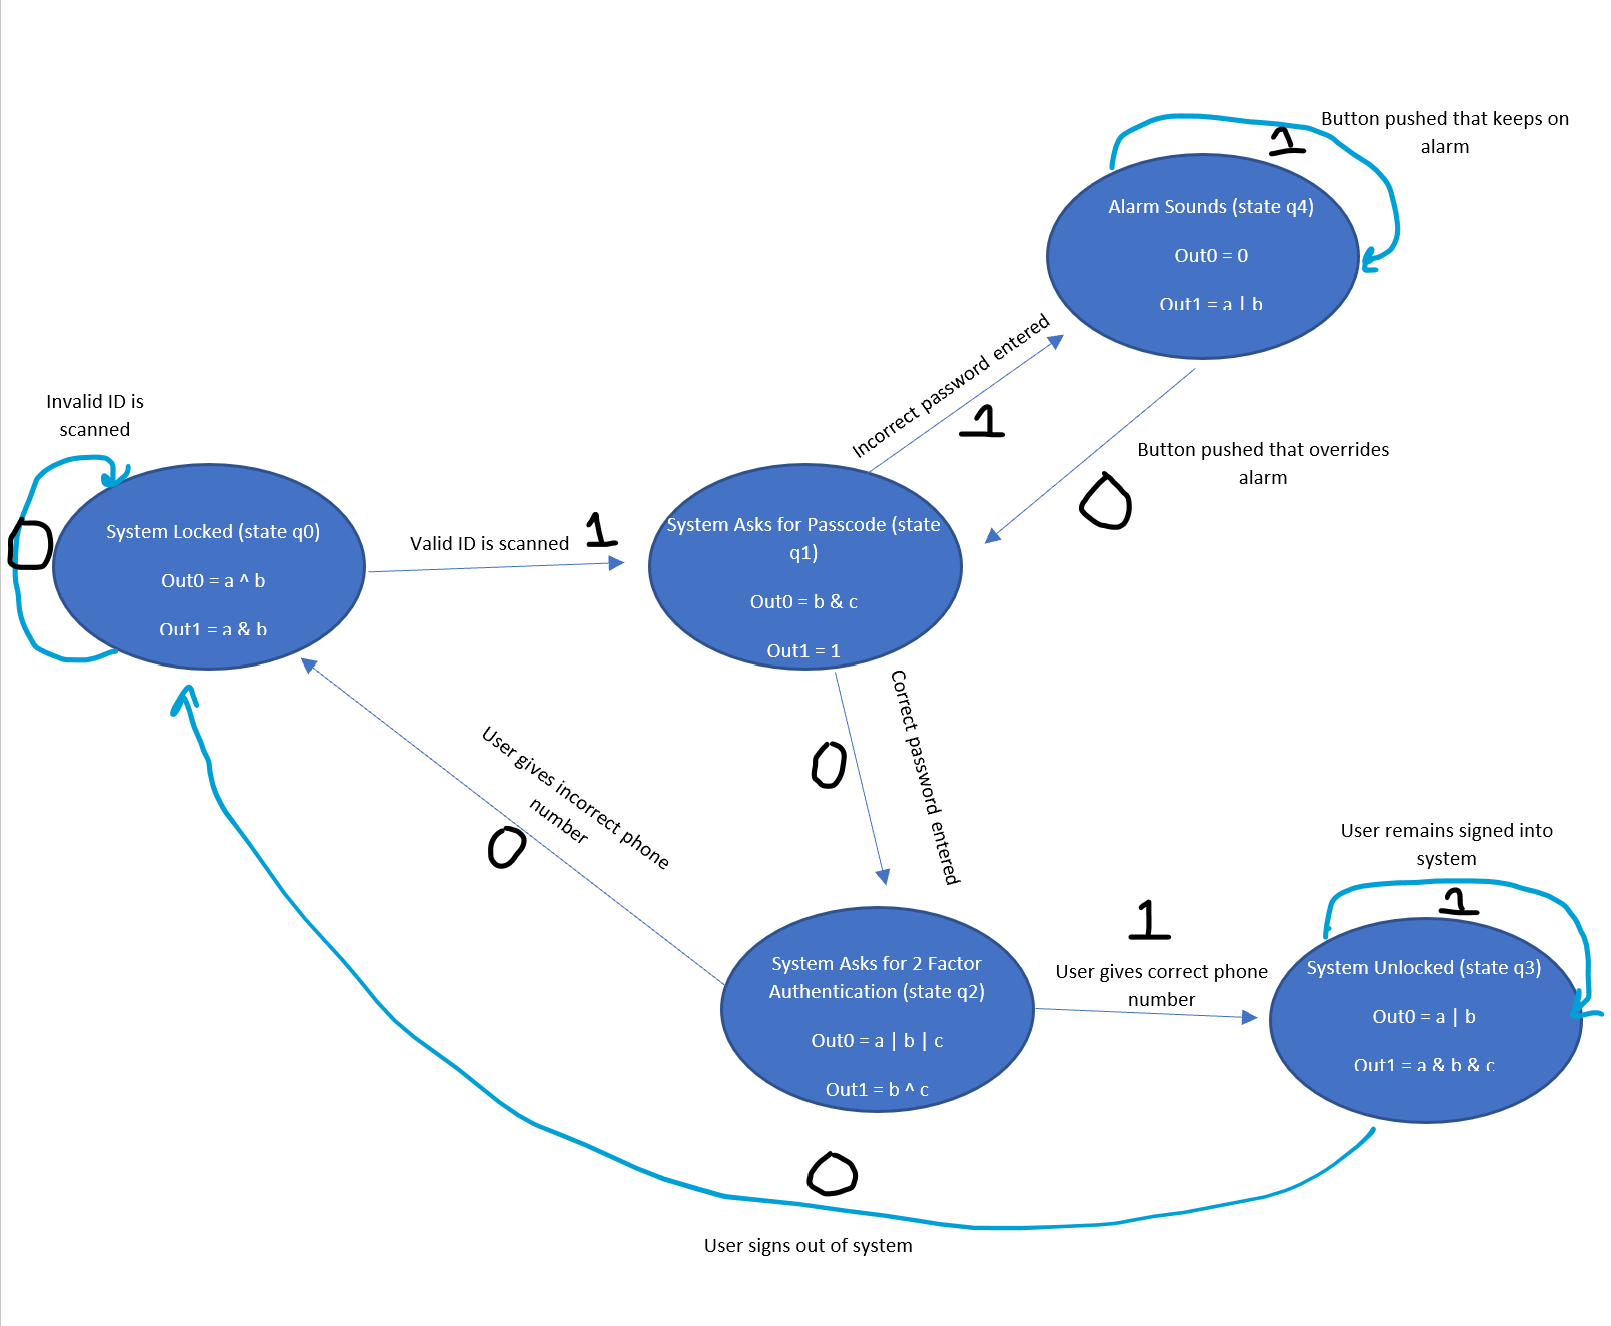

Here is the truth table for our Finite State Machine

| State | out_0 | out_1 | next_state 0 | next_state 1 |
|---|---|---|---|---|
|q0| a ^ b | a & b | q0 | q1 |
|q1| b & c | 1 | q2 | q4 |
|q2| a or b or c | b ^ c | q0 | q3 |
|q3| a or b | a & b & c| q0 | q3 |
|q4| 0 | a or b | q2 | q4 |

Here are the expected outputs:

| Start State | a | b | c | out_0 | out_1 | Control | Next State |
|---|---|---|---|---|---|---|---|
|<b><font color="purple">q0</font></b>|1|0|0|<b><font color="red">a ^ b = 1</font></b>| a & b = <b><font color="blue">0</font></b>| 0 | q0 |
|<b><font color="purple">q0</font></b>|1|1|0|a ^ b = <b><font color="red">0</font></b>| <b><font color="blue">a & b = 1</font></b> | 1 | q1 |
|<b><font color="purple">q1</font></b>|0|1|0|b & c = <b><font color="red">0</font></b>| <b><font color="blue">1</font></b> | 0 | q2 |
|<b><font color="purple">q2</font></b>|1|1|1|<b><font color="red">a or b or c = 1</font></b>| <b><font color="blue">b ^ c = 0</font></b> | 1 | q3 |
|<b><font color="purple">q3</font></b>|1|0|0|a or b = <b><font color="red">1</font></b>| a & b & c = <b><font color="blue">0</font></b> | 1 | q3 |
|<b><font color="purple">q3</font></b>|1|1|1|<b><font color="red">a or b = 1</font></b>| <b><font color="blue">a & b & c = 1</font></b> | 0 | q0 |
|<b><font color="purple">q0</font></b>|0|1|1| a ^ b = <b><font color="red">1</font></b> | a & b = <b><font color="blue">0</font></b> | 1 | q1 |
|<b><font color="purple">q1</font></b>|1|1|0| b & c = <b><font color="red">0</font></b> |<b><font color="blue">1</font></b> | 1 | q4 |
|<b><font color="purple">q4</font></b>|1|1|1| <b><font color="red">0</font></b>| a or b = <b><font color="blue">1</font></b> | 1 | q4 |
|<b><font color="purple">q4</font></b>|0|1|1| <b><font color="red">0</font></b>| a or b = <b><font color="blue">1</font></b> | 0 | q1 |

In [7]:
def curr_state_op( curr_state, a_input, b_input, c_input ):
    
    
    with pyrtl.conditional_assignment:
        
       
        state_out_0 = pyrtl.WireVector(1)
        state_out_1 = pyrtl.WireVector(1)
        
        
        
        # State q0
        with curr_state == 0:
            state_out_0 |= two_input_xor( a_input, b_input )
            state_out_1 |= two_input_and( a_input, b_input )
        
        # State q1
        with curr_state == 1:
            state_out_0 |= two_input_and( b_input, c_input )
            state_out_1 |= 1
        
        # State q2
        with curr_state == 2:
            state_out_0 |= three_input_or( a_input, b_input, c_input )
            state_out_1 |= two_input_xor( b_input, c_input )

        # State q3
        with curr_state == 3:
            state_out_0 |= two_input_or( a_input, b_input )
            state_out_1 |= three_input_and( a_input, b_input, c_input )

        # State q4
        with curr_state == 4:
            state_out_0 |= 0
            state_out_1 |= two_input_or( a_input, b_input )
            
       
        return state_out_0, state_out_1

In [8]:
def next_state( curr_state, control_signal ):
    
    
    with pyrtl.conditional_assignment:
            
       
        
        # State q0
        with curr_state == 0:
            
            with control_signal == 0:
                curr_state.next |= 0
                
            with control_signal == 1:
                curr_state.next |= 1
                
        # State q1
        with curr_state == 1:
            
            with control_signal == 0:
                curr_state.next |= 2
                
            with control_signal == 1:
                curr_state.next |= 4
                
        # State q2
        with curr_state == 2:
            
            with control_signal == 0:
                curr_state.next |= 0
                
            with control_signal == 1:
                curr_state.next |= 3
                
        # State q3
        with curr_state == 3:
            
            with control_signal == 0:
                curr_state.next |= 0
                
            with control_signal == 1:
                curr_state.next |= 3
                

        # State q4
        with curr_state == 4:
            
            with control_signal == 0:
                curr_state.next |= 1
                
            with control_signal == 1:
                curr_state.next |= 4
        
        
        return curr_state.next

In [9]:
def Finite_State_Machine_Sim( ):
    
    
    pyrtl.reset_working_block()
    
    
    
    # Inputs 
    control_signal = pyrtl.Input(2, 'control_signal')
    a_in = pyrtl.Input(1, 'a_in')
    b_in = pyrtl.Input(1, 'b_in')
    c_in = pyrtl.Input(1, 'c_in')
    
    # Outputs
    output_0 = pyrtl.Output(1, 'output_0')
    output_1 = pyrtl.Output(1, 'output_1')
    
    
    
    curr_state = pyrtl.Register(3, 'curr_state')

    
   
    inter_0, inter_1 = curr_state_op( curr_state, a_in, b_in, c_in )
    
    output_0 <<= inter_0
    output_1 <<= inter_1
    
    
    curr_state = next_state( curr_state, control_signal )
    
    
    sim = pyrtl.Simulation()
    
    
    control_signals = [0,1,0,1,1,0,1,1,1,0]
    a_inputs        = [1,1,0,1,1,1,0,1,1,0]
    b_inputs        = [0,1,1,1,0,1,1,1,1,1]
    c_inputs        = [0,0,0,1,0,1,1,0,1,1]
    
    
    
    
    for value in range(0, len(a_inputs)):

        sim.step({
            
            'control_signal' : control_signals[value],
            'a_in' : a_inputs[value],
            'b_in' : b_inputs[value],
            'c_in' : c_inputs[value] 
            
        })
    
    
    sim.tracer.render_trace()

In [10]:
Finite_State_Machine_Sim()

<IPython.core.display.Javascript object>

Generated Waveform:

| Start State | a | b | c | out_0 | out_1 | Control | Next State |
|---|---|---|---|---|---|---|---|
|<b><font color="purple">q0</font></b>|1|0|0|<b><font color="red">a ^ b = 1</font></b>| a & b = <b><font color="blue">0</font></b>| 0 | q0 |
|<b><font color="purple">q0</font></b>|1|1|0|a ^ b = <b><font color="red">0</font></b>| <b><font color="blue">a & b = 1</font></b> | 1 | q1 |
|<b><font color="purple">q1</font></b>|0|1|0|b & c = <b><font color="red">0</font></b>| <b><font color="blue">1</font></b> | 0 | q2 |
|<b><font color="purple">q2</font></b>|1|1|1|<b><font color="red">a or b or c = 1</font></b>| <b><font color="blue">b ^ c = 0</font></b> | 1 | q3 |
|<b><font color="purple">q3</font></b>|1|0|0|a or b = <b><font color="red">1</font></b>| a & b & c = <b><font color="blue">0</font></b> | 1 | q3 |
|<b><font color="purple">q3</font></b>|1|1|1|<b><font color="red">a or b = 1</font></b>| <b><font color="blue">a & b & c = 1</font></b> | 0 | q0 |
|<b><font color="purple">q0</font></b>|0|1|1| a ^ b = <b><font color="red">1</font></b> | a & b = <b><font color="blue">0</font></b> | 1 | q1 |
|<b><font color="purple">q1</font></b>|1|1|0| b & c = <b><font color="red">0</font></b> |<b><font color="blue">1</font></b> | 1 | q4 |
|<b><font color="purple">q4</font></b>|1|1|1| <b><font color="red">0</font></b>| a or b = <b><font color="blue">1</font></b> | 1 | q4 |
|<b><font color="purple">q4</font></b>|0|1|1| <b><font color="red">0</font></b>| a or b = <b><font color="blue">1</font></b> | 0 | q1 |